In [ ]:
import pandas as pd
import numpy as np
from keras.datasets import boston_housing
from keras import layers, models, optimizers
from matplotlib import pyplot

In [2]:
(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

print(train_data.shape)
print(train_labels.shape)
print(test_data.shape)
print(test_labels.shape)

(404, 13)
(404,)
(102, 13)
(102,)


In [3]:
mean = train_data.mean(axis=0)
std = train_data.std(axis=0)

train_data = (train_data - mean) / std
test_data = (test_data - mean) / std

In [4]:
def build_model(learning_rate, input_data):
  model = models.Sequential()
  model.add(layers.Input((input_data,)))
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(1))
  model.compile(optimizer=optimizers.RMSprop(learning_rate=learning_rate), loss='mse', metrics=['mae'])
  return model

In [5]:
k = 4
num_val_samples = len(train_data) // k
epochs = 120
all_history = []

In [6]:
def extract(arr, idx1, idx2):
  rest = np.concatenate((arr[:idx1], arr[idx2:]))
  middle = arr[idx1:idx2]
  return (rest, middle)

for i in range(k):
  print('fold', i)
  from_idx = num_val_samples * i
  to_idx = num_val_samples * (i + 1)

  partial_train_data, validation_data = extract(train_data, from_idx, to_idx)
  partial_train_labels, validation_labels = extract(train_labels, from_idx, to_idx)

  model = build_model(0.001, 13)
  history = model.fit(
    partial_train_data,
    partial_train_labels,
    epochs=epochs,
    batch_size=16,
    validation_data=(validation_data, validation_labels),
    verbose=0
  )
  print('evaluation', model.evaluate(test_data, test_labels))

  all_history.append(history.history['val_mae'])

fold 0
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 21.5657 - mae: 2.5247 
evaluation [36.99274444580078, 2.6864354610443115]
fold 1
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 26.0503 - mae: 2.7988 
evaluation [46.02497863769531, 3.004857301712036]
fold 2
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 25.7227 - mae: 2.6552 
evaluation [44.89345169067383, 2.807490825653076]
fold 3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 22.5836 - mae: 2.5111
evaluation [41.5259895324707, 2.7635579109191895]


2.0288918018341064
2.399677038192749
2.637458324432373
2.4214327335357666


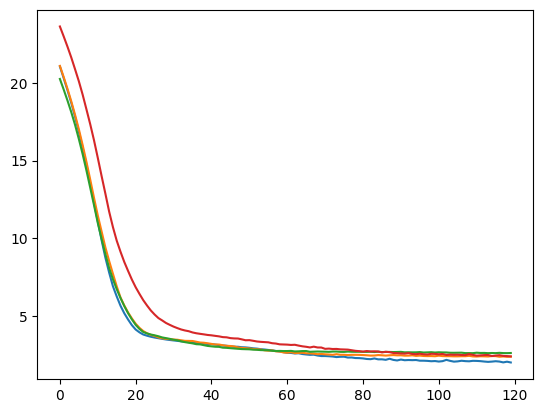

In [8]:
for history in all_history:
  assert(len(history) == epochs)
  print(history[-1])
  pyplot.plot(range(epochs), history)